![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Ecuaciones no Lineales - Primera Parte

***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*

### Búsqueda de raíces en ecuaciones no lineales
___

Problema a resolver: Hallar $p$ tal que $f(p)=0,$ $p  \in [a,b].$

¿Por qué necesitamos una solución numérica a este problema?
- No siempre podemos despejar la incóginta.
- Muchas veces resulta más cómodo plantear una solución numérica e iterativa.
- Otras veces no existe solución algebraica al problema que queremos resolver.

### Método de la bisección
___
Supongamos una función cualquiera $f(x)$ y hallemos el valor de $\hat{x}$, tal que $f(\hat{x}) = 0$, siendo $\hat{x} \in [a,b]$.

Calculemos nuestra primera aproximación de $\hat{x}$ tomando el valor medio del intervalo, es decir:

$$ x_1= \frac{a+b}{2} $$
1. Verificar si es la solución, es decir que $f(x_1) = 0$.
2. Si no lo es, volver a definir el intervalo. Para ello, verifiquemos que $f(a) · f(x_1) < 0$.
3. Si es cierto, entonces nuestro nuevo intervalo será $[a, x_1]$ y si no lo es, nuestro intervalo será $[x_1, b]$.
4. Repetir el proceso y definir $x_2$ como el valor medio de mi nuevo intervalo.
5. ¿Hasta cuándo? Tengo que definir una tolerancia y un criterio de corte

### Criterio de corte y tolerancia
___

¿Hasta cuándo? Tengo que definir una tolerancia y un criterio de corte.

Algunos _criterios de corte_:

$$Error_{relativo}=\frac{|x_{n+1}-x_{n}|}{|x_{n+1}|} \leq Tolerancia $$

$$Error_{absoluto}=|x_{n+1}-x_{n}| \leq Tolerancia $$

$$Error_{absolutodeF}=|f(x_{n+1})|\leq Tolerancia$$

En general preferimos el *error relativo* por ser más representativo.

La _Tolerancia_ se elige en función a las características del problema que quiero resolver.








In [2]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos

#programo el método bisección
def biseccion(a, b , tol, itmax = 100):
        df = pd.DataFrame(columns=('ai','bi','pi','cond'))
        a = a
        b = b
        contador = 0
        x0, x1 = a, b
        if(f(a) * f(b)>0):         #condicion de aplicabilidad del método
            print( "El método no resuelve este tipo de raíz")
            return
        while (contador < itmax) and (abs((x1 - x0) / x1) > tol):
            x0 = x1
            x1 = (a + b)/2
            if f(x1) * f(a) < 0:
                df.loc[contador] = [a,b,(a+b)/2,'<0']
                b = x1
            else:
                df.loc[contador] = [a,b,(a+b)/2,'>0']
                a = x1
            contador += 1
        error = abs((x1 - x0) / x1)
        print('El método de bisección convergió en',contador,'iteraciones')
        return df


### Ejemplo usando bisección
___

Hallar $p$ tal que $f(p)=0,$ $p  \in [0,4]$ siendo :
$$f(x)=(x+e^\frac{x}{2}).cos(x)+5$$


In [3]:
#defino el intervalo de arranque y la tolerancia
A=0
B=4
tolerancia=10**(-15)

def f(x):#definimos la función con la que vamos a trabajar
    return (x+np.e**(x/2))*np.cos(x)+5   #Acá está el ejemplo de arriba, deben cambiar la función si quieren probar otra

#A la hora de probar un ejemplo, recueden que para aplicar estos dos métodos se debe cumplir:
# - que la función sea contínua en el intervalo
# - que exista una raíz en el intervalo y que sea única y con multiplicidad impar (si 'rebota', no puedo aplicar el método)

ejemplo=biseccion(A, B, tolerancia)


El método de bisección convergió en 51 iteraciones


In [4]:
from IPython.display import display, Math
import sympy.printing as printing

a = ejemplo.ai
b = ejemplo.bi
x = ejemplo.pi
cond= ejemplo.cond

print ("Analicemos las primeras iteraciones. \n")

for p in range (5):
    print ("Iteración "+str(p)+": ")
    print ("Tenemos como información que: \n")
    ec = "a_"+str(p)+"= "+str(a[p])+";b_"+str(p)+"= "+str(b[p])+";x_"+str(p)+"=\\frac{a_"+str(p)+"+b_"+str(p)+"}{2}"+"="+str(x[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

    print ("Evalúo en que intervalo se encuentra la raíz:")

    ec = "f(a_"+str(p)+")*f(x_"+str(p)+")"+"= "+"f("+str(a[p])+")*f("+str(x[p])+")"+str(cond[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

    print ("Por lo tanto redefino los extremos del intervalo en la próxima iteración. \n")





Analicemos las primeras iteraciones. 

Iteración 0: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evalúo en que intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto redefino los extremos del intervalo en la próxima iteración. 

Iteración 1: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evalúo en que intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto redefino los extremos del intervalo en la próxima iteración. 

Iteración 2: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evalúo en que intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto redefino los extremos del intervalo en la próxima iteración. 

Iteración 3: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evalúo en que intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto redefino los extremos del intervalo en la próxima iteración. 

Iteración 4: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evalúo en que intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto redefino los extremos del intervalo en la próxima iteración. 



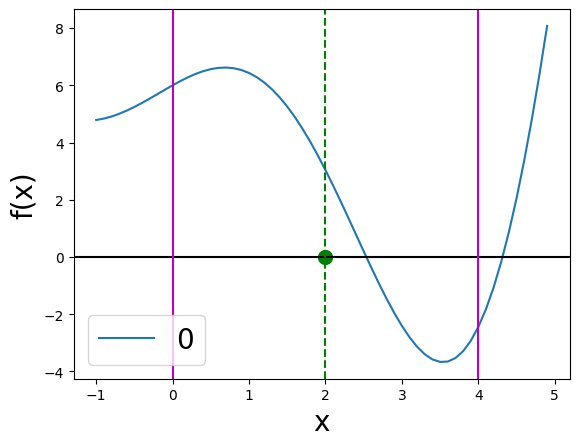

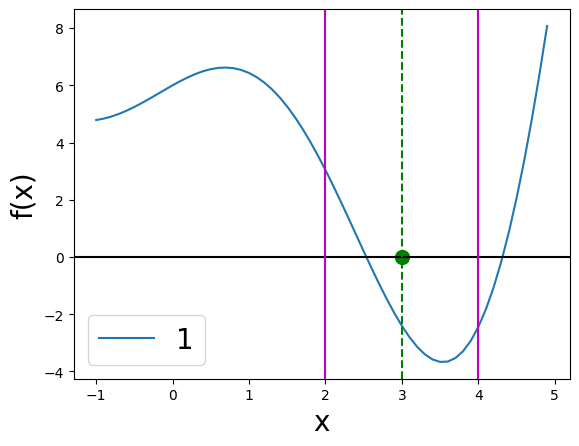

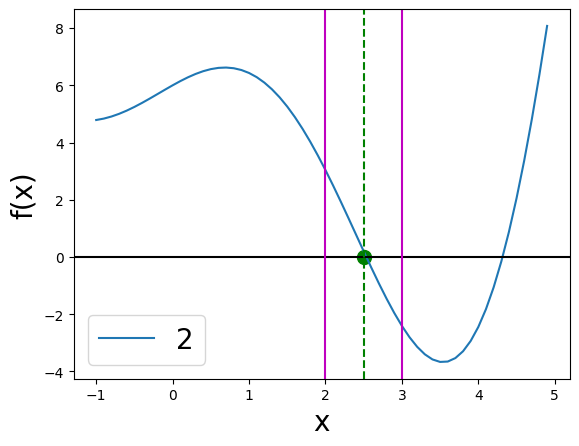

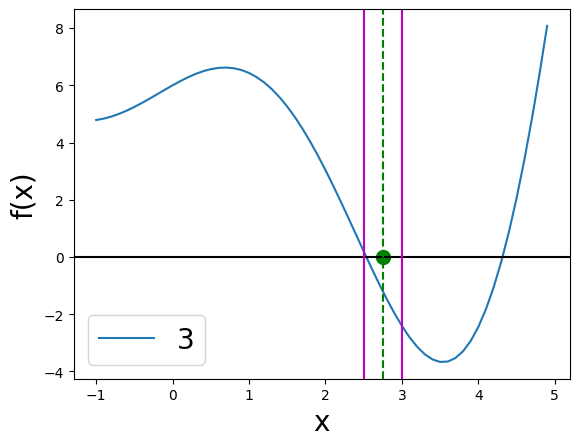

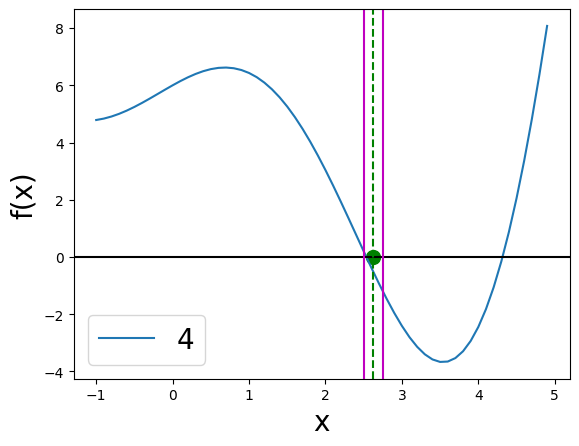

In [5]:
import matplotlib.pyplot as plt
ejex = np.arange(-1, 5, 0.1);
y = f(ejex)

for p in range (5):
    fig = plt.figure()
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=20)
    plt.ylabel('f(x)',fontsize=20)
    plt.legend(str(p),fontsize=20)
    plt.axhline(y=0, color='k')
    plt.scatter(x=x[p], y=0, marker="o", c='green', s=100)
    plt.axvline(x=x[p], color='g',linestyle='dashed')
    plt.axvline(x=a[p], color='m')
    plt.axvline(x=b[p], color='m');

In [6]:
print('Resumen de resultados para bisección:')
print('A continuación se muestran las primeras iteraciones:')
ejemplo.head(10)

# en la tabla, 'cond' hace referencia al producto de f(ai)*f(xi),
# la condición que estamos evaluando para redefinir el nuevo intervalo donde vamos a buscar la raíz.

Resumen de resultados para bisección:
A continuación se muestran las primeras iteraciones:


,ai,bi,pi,cond
0,0.00000,4.000000,2.000000,>0
1,2.00000,4.000000,3.000000,<0
2,2.00000,3.000000,2.500000,>0
3,2.50000,3.000000,2.750000,<0
4,2.50000,2.750000,2.625000,<0
5,2.50000,2.625000,2.562500,<0
6,2.50000,2.562500,2.531250,>0
7,2.53125,2.562500,2.546875,<0
8,2.53125,2.546875,2.539062,<0
9,2.53125,2.539062,2.535156,<0


### Método Regula falsi
___
Supongamos una función cualquiera $f(x)$ y hallemos el valor de $\hat{x}$, tal que $f(\hat{x}) = 0$, siendo $\hat{x} \in [a,b]$.

Calculemos nuestra primera aproximación de $\hat{x}$ utilizando la cuerda que une los extremos de la función, es decir:

$$ x_1= a_1-f(a_1)*\frac{b_1-a_1}{f(b_1)-f(a_1)}, ó $$  $$ x_1= b_1-f(b_1)*\frac{b_1-a_1}{f(b_1)-f(a_1)} $$
1. Verificar si es la solución, es decir que $f(x_1) = 0$.
2. Si no lo es, volver a definir el intervalo. Para ello, verifiquemos que $f(a) · f(x_1) < 0$.
3. Si es cierto, entonces nuestro nuevo intervalo será $[a, x_1]$ y si no lo es, nuestro intervalo será $[x_1, b]$.
4. Repetir el proceso y definir $x_2$ como el valor medio de mi nuevo intervalo.
5. ¿Hasta cuándo? Tengo que definir una tolerancia y un criterio de corte

In [7]:
def regulafalsi(a, b , tol, itmax = 100):
        df = pd.DataFrame(columns=('ai','bi','pi','cond'))
        a = a
        b = b
        contador = 0
        x0, x1 = a, b
        if(f(a) * f(b)>0):         #condicion de aplicabilidad del método
            print( "El método no resuelve este tipo de raíz")
            return
        while (contador < itmax) and (abs((x1 - x0) / x1) > tol):
            x0 = x1
            x1 = a-(f(a)*(b-a)/(f(b)-f(a)))
            if f(x1) * f(a) < 0:
                df.loc[contador] = [a,b,a-(f(a)*(b-a)/(f(b)-f(a))) ,'<0']
                b = x1
            else:
                df.loc[contador] = [a,b,a-(f(a)*(b-a)/(f(b)-f(a))) ,'>0']
                a = x1
            contador += 1
        error = abs((x1 - x0) / x1)
        print('El método de regula-falsi convergió en',contador,'iteraciones')
        return df

In [8]:
#aplico el método Regula Falsi al mismo ejemplo anterior

ejemploRF=regulafalsi(A, B, tolerancia)

El método de regula-falsi convergió en 10 iteraciones


In [9]:
aRF = ejemploRF.ai
bRF = ejemploRF.bi
xRF = ejemploRF.pi
condRF= ejemploRF.cond

print ("Analicemos las primeras iteraciones. \n")

for p in range (5):
    print ("Iteración "+str(p)+": ")
    print ("Tenemos como información que: \n")
    ec = "a_"+str(p)+"= "+str(aRF[p])+";b_"+str(p)+"= "+str(bRF[p])+";x_"+str(p)+"=a_"+str(p)+"-f(a_"+str(p)+")*\\frac{b_"+str(p)+"-a_"+str(p)+"}{f(b_"+str(p)+")-f(a_"+str(p)+")}"+"="+str(xRF[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

    print ("Evalúo en que intervalo se encuentra la raíz:")

    ec = "f(a_"+str(p)+")*f(x_"+str(p)+")"+"= "+"f("+str(aRF[p])+")*f("+str(xRF[p])+")"+str(condRF[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

    print ("Por lo tanto redefino los extremos del intervalo en la próxima iteración. \n")



Analicemos las primeras iteraciones. 

Iteración 0: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evalúo en que intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto redefino los extremos del intervalo en la próxima iteración. 

Iteración 1: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evalúo en que intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto redefino los extremos del intervalo en la próxima iteración. 

Iteración 2: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evalúo en que intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto redefino los extremos del intervalo en la próxima iteración. 

Iteración 3: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evalúo en que intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto redefino los extremos del intervalo en la próxima iteración. 

Iteración 4: 
Tenemos como información que: 



<IPython.core.display.Math object>

Evalúo en que intervalo se encuentra la raíz:


<IPython.core.display.Math object>

Por lo tanto redefino los extremos del intervalo en la próxima iteración. 



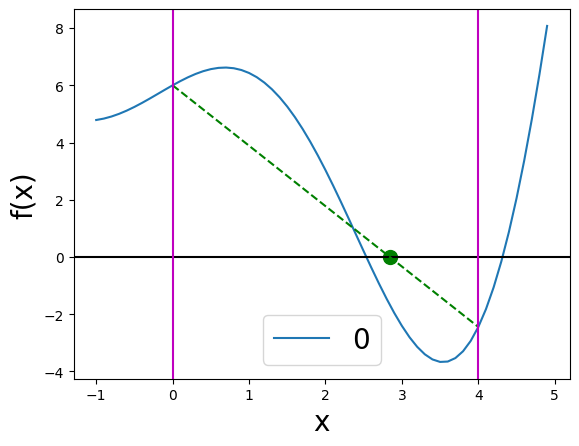

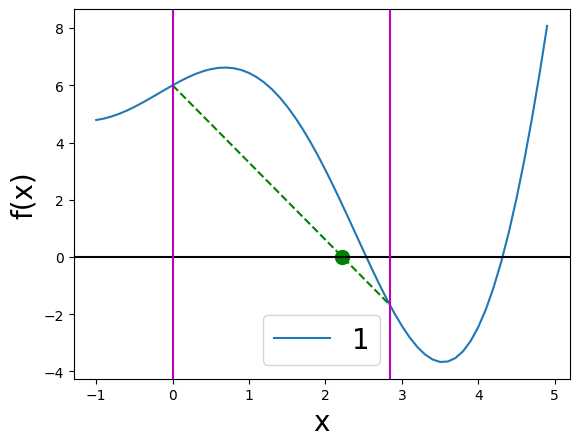

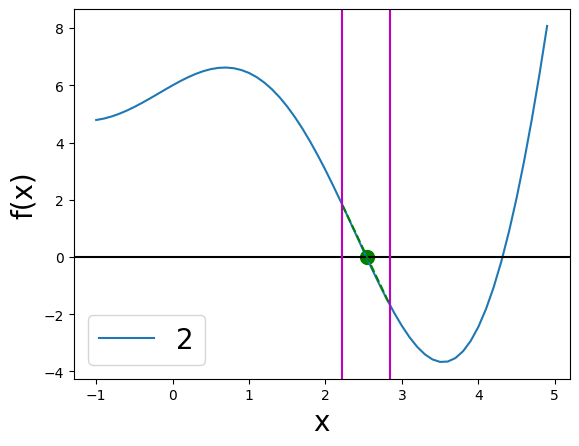

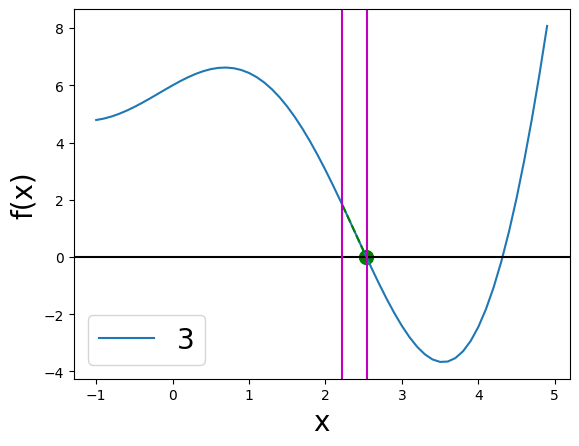

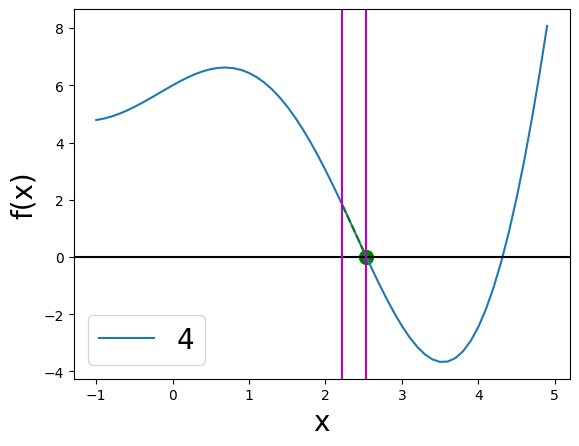

In [10]:
ejex = np.arange(-1, 5, 0.1);
y = f(ejex)

for p in range (5):
    fig = plt.figure()
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=20)
    plt.ylabel('f(x)',fontsize=20)
    plt.legend(str(p),fontsize=20)
    plt.axhline(y=0, color='k')
    plt.scatter(x=xRF[p], y=0, marker="o", c='green', s=100)
    plt.plot([aRF[p],bRF[p]], [f(aRF[p]),f(bRF[p])], color='g',linestyle='dashed')
    plt.axvline(x=aRF[p], color='m')
    plt.axvline(x=bRF[p], color='m');


In [11]:
print('Resumen de resultados para Regula-Falsi:')
print('A continuación se muestran las primeras iteraciones:')
ejemploRF.head(10)

Resumen de resultados para Regula-Falsi:
A continuación se muestran las primeras iteraciones:


,ai,bi,pi,cond
0,0.000000,4.000000,2.842126,<0
1,0.000000,2.842126,2.222485,>0
2,2.222485,2.842126,2.544446,<0
3,2.222485,2.544446,2.534899,<0
4,2.222485,2.534899,2.534823,<0
5,2.222485,2.534823,2.534823,<0
6,2.222485,2.534823,2.534823,<0
7,2.222485,2.534823,2.534823,<0
8,2.222485,2.534823,2.534823,<0
9,2.222485,2.534823,2.534823,>0


### Algunas conclusiones
___

Tanto el método _Bisección_ como el método _Regula Falsi_ decimos que son __Métodos de arranque.__
Estos convergen siempre, pero lo hacen muy lentamente.
El método _Regula Falsi_ converge más rápido que _Bisección_ debido a que usa información de la función para aproximar la raíz.

![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)



# GRACIAS POR SU ATENCIÓN



### Ecuaciones no Lineales - Primera Parte

***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*